# Project Introduction

The present project takes subscribers data in 2024 and aims to answer general questions based on exploration of said data.

1. Identification of Top Performers

2. Trends by Category

3. Geographical Insights

4. Comparison of Brands

5. Language Trends

6. Category vs. Subscriber Count

7. Segmentation


## Analysis of the data

In [1]:
#database
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/youtube-subscribers-data-2024/youtube_subscribers_data.csv


In [2]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [3]:
#libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

In [4]:
db = pd.read_csv("/kaggle/input/youtube-subscribers-data-2024/youtube_subscribers_data.csv")
db.head()

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,MrBeast,No,335.0,English,Entertainment,United States
1,T-Series,Yes,280.0,Hindi,Music,India
2,Cocomelon - Nursery Rhymes,Yes,186.0,English,Education,United States
3,SET India,Yes,180.0,Hindi,Entertainment,India
4,Vlad and Niki,No,129.0,English,Entertainment,Russia


In [5]:
db.head(10)

,Name,Brand channel,Subscribers (millions),Primary language,Category,Country
0,MrBeast,No,335.0,English,Entertainment,United States
1,T-Series,Yes,280.0,Hindi,Music,India
2,Cocomelon - Nursery Rhymes,Yes,186.0,English,Education,United States
3,SET India,Yes,180.0,Hindi,Entertainment,India
4,Vlad and Niki,No,129.0,English,Entertainment,Russia
5,Kids Diana Show,Yes,128.0,English,Entertainment,United States Ukraine
6,Like Nastya,No,123.0,English,Entertainment,United States Ukraine
7,Zee Music,Yes,112.0,Hindi,Music,India
8,PewDiePie,No,110.0,English,Entertainment,Sweden Japan
9,WWE,Yes,105.0,English,Sports,United States


### Data Cleaning
- Are there repeated values or situations that need to be taken care of?

In [6]:
for x in db.columns:
    print(db[x].unique())

['MrBeast' 'T-Series' 'Cocomelon - Nursery Rhymes' 'SET India'
 'Vlad and Niki' 'Kids Diana Show' 'Like Nastya' 'Zee Music' 'PewDiePie'
 'WWE' 'Goldmines' 'Stokes Twins' 'Sony SAB' 'Blackpink'
 'ChuChu TV Nursery Rhymes & Kids Songs' 'Zee TV' '5-Minute Crafts'
 'BANGTANTV' 'Pinkfong' 'Colors TV' 'Hybe Labels' 'Justin Bieber'
 'T-Series Bhakti Sagar' '김프로KIMPRO' 'UR · Cristiano' 'A4' 'Tips Official'
 'Shemaroo Filmi Gaane' 'Alan Chikin Chow' 'ZAMZAM ELECTRONICS TRADING'
 'Aaj Tak' 'Toys and Colors' 'Canal KondZilla' 'El Reino Infantil'
 'Infobells - Hindi' 'Wave Music' 'Eminem Music' 'YRF' 'Movieclips'
 'Sony Music India' 'HAR PAL GEO' 'KL BRO Biju Rithvik' 'Dude Perfect'
 'Taylor Swift' 'Mark Rober' 'ARY Digital HD' 'Fede Vigevani'
 'LooLoo Kids' 'BillionSurpriseToys' 'Marshmello']
['No' 'Yes']
[335.  280.  186.  180.  129.  128.  123.  112.  110.  105.  101.  100.
  97.5  95.3  94.2  86.   81.1  79.4  79.2  77.5  76.2  74.4  72.5  71.9
  71.3  71.1  70.8  70.2  69.2  68.9  68.6  67.9 

In [7]:
#We identify certain cases
#category
print(db[db["Category"]=="Entertainment/Sports"])
print()
print(db[db["Category"]=="Education/Entertainment"])
print()
#language
print(db[db["Primary language"]=='Portuguese, English'])
#country
print()
print(db[db["Country"]=='Sweden \xa0Japan'])
print()
print(db[db["Country"]=='United States \xa0Ukraine'])
print()
print(db[db["Country"]=='Cyprus[a]'])

              Name Brand channel  Subscribers (millions)     Primary language  \
24  UR · Cristiano            No                    71.3  Portuguese, English   

                Category   Country  
24  Entertainment/Sports  Portugal  

          Name Brand channel  Subscribers (millions) Primary language  \
44  Mark Rober            No                    60.2          English   

                   Category        Country  
44  Education/Entertainment  United States  

              Name Brand channel  Subscribers (millions)     Primary language  \
24  UR · Cristiano            No                    71.3  Portuguese, English   

                Category   Country  
24  Entertainment/Sports  Portugal  

        Name Brand channel  Subscribers (millions) Primary language  \
8  PewDiePie            No                   110.0          English   

        Category        Country  
8  Entertainment  Sweden  Japan  

              Name Brand channel  Subscribers (millions) Primary language 

In [8]:
#These double categories can be easily be categorised as mostly one, for this reason we simplify and replace these values.

#category
db.replace("Entertainment/Sports", "Entertainment", inplace=True)
db.replace("Education/Entertainment", "Education", inplace=True)
db.replace('Portuguese, English', "English", inplace=True)
db.replace('Sweden \xa0Japan', "Sweden", inplace=True)
db.replace('Cyprus[a]', "Cyprus", inplace=True)
db.replace('United States \xa0Ukraine', "Ukraine", inplace=True)

## 1. Top Performers
Which channels have the most subscribers in 2024?

In [9]:
db = db.sort_values(by="Subscribers (millions)",ascending=False)
print(db.head(5))

                         Name Brand channel  Subscribers (millions)  \
0                     MrBeast            No                   335.0   
1                    T-Series           Yes                   280.0   
2  Cocomelon - Nursery Rhymes           Yes                   186.0   
3                   SET India           Yes                   180.0   
4               Vlad and Niki            No                   129.0   

  Primary language       Category        Country  
0          English  Entertainment  United States  
1            Hindi          Music          India  
2          English      Education  United States  
3            Hindi  Entertainment          India  
4          English  Entertainment         Russia  


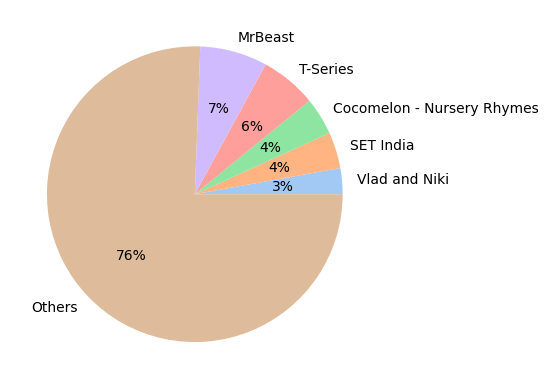

In [10]:
# Identify the top 5 categories by value
piechart = db[['Name','Subscribers (millions)']]
top_5_categories = piechart.nlargest(5, 'Subscribers (millions)')['Name']
piechart.loc[~piechart['Name'].isin(top_5_categories), 'Name'] = 'Others'
aggregated = piechart.groupby('Name', as_index=False)['Subscribers (millions)'].sum().sort_values(by='Subscribers (millions)')
colors = sns.color_palette('pastel')
plt.pie(aggregated["Subscribers (millions)"], labels = aggregated["Name"], colors = colors, autopct='%.0f%%')
plt.show()

What is the average subscriber count across all channels?

In [11]:
print(db["Subscribers (millions)"].mean())

90.962


## 2. Trends by Category
What are the most popular content categories based on subscriber counts?
Is there a significant difference in subscriber counts between categories?

In [12]:
categ_anal = db.groupby("Category").agg({
    'Subscribers (millions)': 'sum'})
print(categ_anal.sort_values("Subscribers (millions)",ascending= False))
#print(categ_anal)

                 Subscribers (millions)
Category                               
Entertainment                    2096.5
Music                            1424.1
Education                         486.2
Film                              163.8
Sports                            105.0
How-to                             81.1
News                               68.6
Lifestyle Vlogs                    62.2
Comedy                             60.6


## 3.Geographical Insights
Which countries have the highest representation in terms of total subscribers?

In [13]:
geo_db = db.groupby("Country").agg({
    "Subscribers (millions)":"sum"})
geo_db = geo_db.sort_values(by="Subscribers (millions)",ascending=False).reset_index()
geo_db['Country']= geo_db['Country'].replace({"United States":"United States of America",'South Korea': 'Republic of Korea'})
geo_db

,Country,Subscribers (millions)
0,India,1628.3
1,United States of America,1285.4
2,Republic of Korea,402.0
3,Ukraine,251.0
4,Russia,129.0
5,Pakistan,122.4
6,Sweden,110.0
7,Cyprus,81.1
8,Canada,74.4
9,Portugal,71.3


/tmp/ipykernel_17/4225876816.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 2000x800 with 0 Axes>

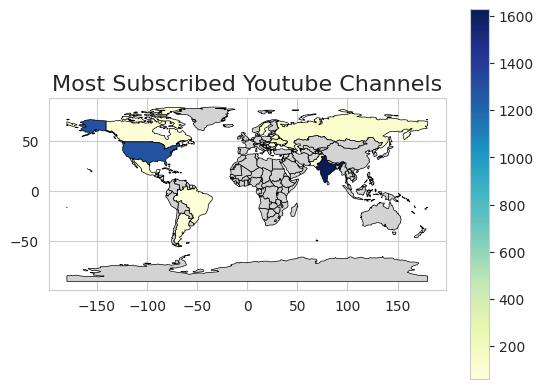

In [14]:
# Load world map from Geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge your data with the world map (match country names)
merged = world.merge(geo_db, left_on='name', right_on='Country', how='left')

# Plot the map
plt.figure(figsize=(20, 8))
sns.set_style('whitegrid')

# Create a choropleth map using the "Subscribers (millions)"
merged.plot(column='Subscribers (millions)',
            cmap='YlGnBu',
            legend=True,
            edgecolor='black',
            linewidth=0.5,
            missing_kwds={"color": "lightgrey", "label": "No data"})

# Add title and labels
plt.title('Most Subscribed Youtube Channels', fontsize=16)

# Show the plot
plt.show()

Are there regional trends in terms of popular categories or primary languages?

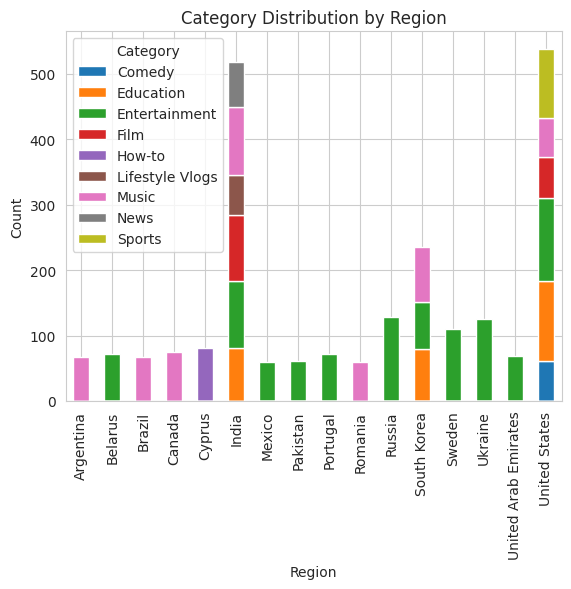

In [15]:
# Trends among countries
db_pt = db.pivot_table(index='Country', columns='Category', values='Subscribers (millions)')
# Plot stacked bar graph
db_pt.plot(kind='bar', stacked=True)
plt.title("Category Distribution by Region")
plt.ylabel("Count")
plt.xlabel("Region")
plt.legend(title="Category")
plt.show()

## 4. Comparison of Brands
Do branded channels have more subscribers on average than non-branded channels?

In [16]:
branded_sub = db.groupby("Brand channel").agg({
    "Subscribers (millions)":("mean","count")
})
branded_sub

Subscribers (millions)      
                                mean count
Brand channel                             
No                         89.995238    21
Yes                        91.662069    29

Which brand channels dominate specific categories (e.g., entertainment, education)?

In [17]:
cat_group = db.groupby(['Category', 'Name'])['Subscribers (millions)'].sum().reset_index()
# Find the brand channel with the highest views in each category
dominant_brands = cat_group.loc[cat_group.groupby('Category')['Subscribers (millions)'].idxmax()]

print(dominant_brands)

           Category                        Name  Subscribers (millions)
0            Comedy                Dude Perfect                    60.6
2         Education  Cocomelon - Nursery Rhymes                   186.0
15    Entertainment                     MrBeast                   335.0
27             Film                   Goldmines                   101.0
29           How-to             5-Minute Crafts                    81.1
30  Lifestyle Vlogs         KL BRO Biju Rithvik                    62.2
42            Music                    T-Series                   280.0
48             News                     Aaj Tak                    68.6
49           Sports                         WWE                   105.0


## 5. Language Trends
Which primary languages dominate the YouTube space in 2024? How does subscriber count differ between English-speaking and non-English-speaking channels?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


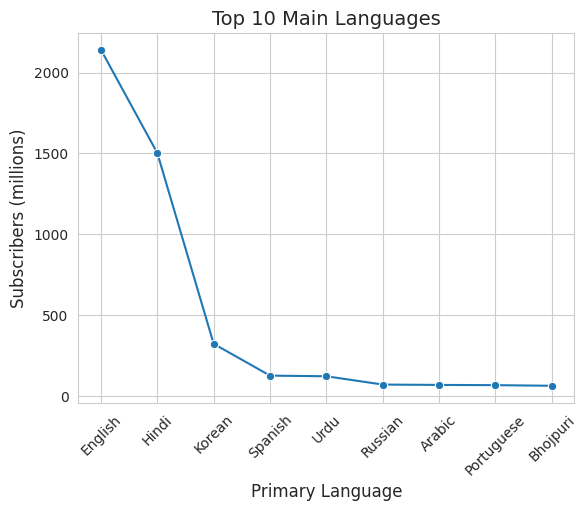

In [18]:
main_lan = db.groupby("Primary language")["Subscribers (millions)"].sum().sort_values(ascending=False)
main_lan = main_lan.reset_index()
main_lan = main_lan[:9]

#graph
sns.lineplot(data=main_lan, x="Primary language", y="Subscribers (millions)", marker='o')
plt.title("Top 10 Main Languages", fontsize=14)
plt.xlabel("Primary Language", fontsize=12)
plt.ylabel("Subscribers (millions)", fontsize=12)
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

## 6. Category vs. Subscriber Count:

Do certain categories (e.g., gaming, beauty, education) attract more subscribers than others?


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Entertainment'),
  Text(1, 0, 'Music'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'Film'),
  Text(4, 0, 'Sports'),
  Text(5, 0, 'How-to'),
  Text(6, 0, 'News'),
  Text(7, 0, 'Lifestyle Vlogs'),
  Text(8, 0, 'Comedy')])

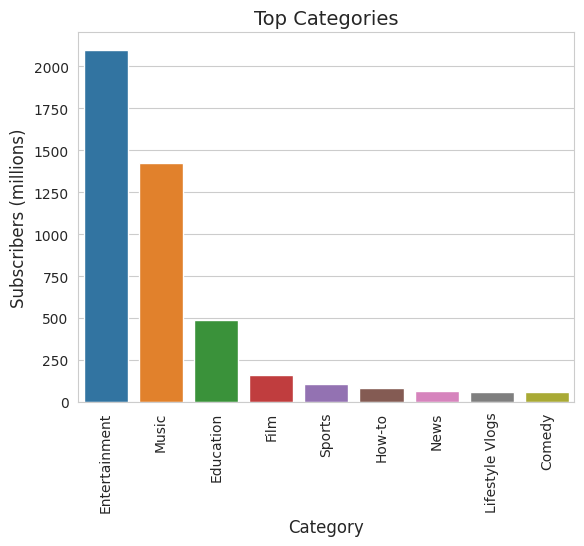

In [19]:
cat_df = db.groupby("Category")["Subscribers (millions)"].sum().reset_index().sort_values(by="Subscribers (millions)", ascending=False)
sns.barplot(data=cat_df, x="Category", y="Subscribers (millions)")
plt.title("Top Categories", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Subscribers (millions)", fontsize=12)
plt.xticks(rotation=90) 

Are there categories where branded channels dominate over individual creators?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Entertainment'),
  Text(1, 0, 'Music'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'Film'),
  Text(4, 0, 'Sports'),
  Text(5, 0, 'How-to'),
  Text(6, 0, 'News'),
  Text(7, 0, 'Lifestyle Vlogs'),
  Text(8, 0, 'Comedy')])

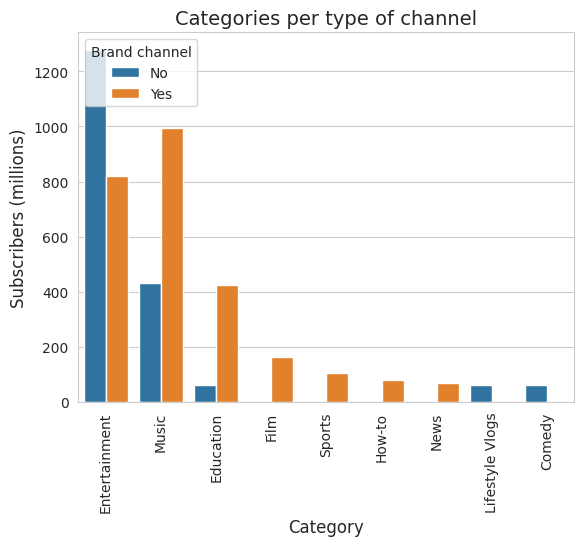

In [20]:
comp_brand = db.groupby(["Category","Brand channel"])["Subscribers (millions)"].sum().reset_index().sort_values(by="Subscribers (millions)", ascending=False)

sns.barplot(data=comp_brand, x="Category", y="Subscribers (millions)",hue='Brand channel')
plt.title("Categories per type of channel", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Subscribers (millions)", fontsize=12)
plt.xticks(rotation=90) 

## 7. Segmentation

Can we group channels into segments based on subscriber count, language, and category?


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

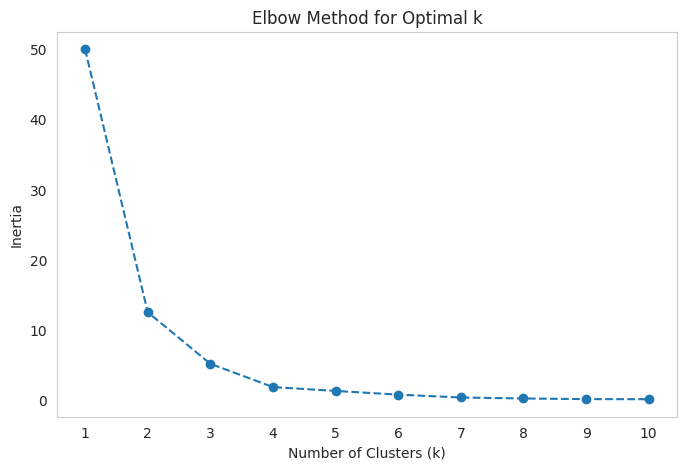

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select only numerical columns for clustering
numerical_columns = db.select_dtypes(include=["float64", "int64"]).columns
X = db[numerical_columns]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k_values = range(1, 11)  # From 1 to 10
inertia = []  # Store the inertia for each k

# Fit K-Means for each k and record the inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid()
plt.show()

In [22]:
from kneed import KneeLocator

# Automatically detect the elbow point
knee = KneeLocator(k_values, inertia, curve="convex", direction="decreasing")
optimal_k = knee.knee
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 3


In [23]:
# We identify the optimal numer of clusters
# Select the relevant columns first
data_encoded = db[["Name", "Subscribers (millions)", "Primary language", "Category", "Country"]]

# One-hot encode only the categorical columns and keep numeric columns intact
data_encoded = pd.get_dummies(data_encoded, columns=['Primary language', 'Category', "Country"], drop_first=True)

# Scale the 'Subscribers (millions)' column
scaler = StandardScaler()
data_encoded['Subscribers (millions)'] = scaler.fit_transform(data_encoded[['Subscribers (millions)']])

# Apply KMeans clustering to the data

kmeans = KMeans(n_clusters=optimal_k, random_state=42)  # Choose n_clusters based on your analysis
data_encoded['cluster'] = kmeans.fit_predict(data_encoded.drop(columns=["Name"]))  # Don't include 'Name' in clustering

# Show the resulting segments
print(data_encoded[["Name","cluster"]].sort_values(by="cluster").reset_index(drop=True))

                                     Name  cluster
0                                 MrBeast        0
1                                T-Series        0
2              Cocomelon - Nursery Rhymes        0
3                               SET India        0
4                                 Aaj Tak        1
5                       Infobells - Hindi        1
6                              Wave Music        1
7                    Shemaroo Filmi Gaane        1
8                           Tips Official        1
9                        Sony Music India        1
10                  T-Series Bhakti Sagar        1
11                                    YRF        1
12                            Hybe Labels        1
13                              Colors TV        1
14                              BANGTANTV        1
15                      El Reino Infantil        1
16                    KL BRO Biju Rithvik        1
17  ChuChu TV Nursery Rhymes & Kids Songs        1
18                             

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
print(db[db["Country"]=="Argentina"])

                 Name Brand channel  Subscribers (millions) Primary language  \
33  El Reino Infantil           Yes                    67.0          Spanish   

   Category    Country  
33    Music  Argentina  


## Key Insights

1. Identification of Top Performers

Mr Beast, T-Series and Cocomelon are the top three performers of the year. It is important to note that the top 5 performers represent the 25% in total of number of subscribers of the database. They greatly surpass the mean of subscribers, which is 90 million.

2. Trends by Category

The clear top 3 categories are entertainment, music and education. Followed by films and lastly sports. It is important to note that entertainment is also an umbrella term, movies, education and sports can also be considered into this category. Therefore, individual analysis into channels and videos themselves is useful. Education, on the other hand, contains an important number of videos geared towards children. Thus, this is an important market for content creators.

3. Geographical Insights

India and the United States hold the most successful channels on the website. In third place, South Korea holds an important space in the cultural space.

4. Comparison of Brands

Most channels on this list (almost 60%) represent Brand Channels or Corporate channels. However, individual creators must be thought of independent for this exercise. I.e. Mr. Beast is a Brand, but not a Brand Channel.

5. Language Trends

English, Hindi and Korean represent the most popular content on the website, followed by Spanish and Urdu. These are the most important primary languages, but not necessary exclusive to the content of the channels.

6. Category vs. Subscriber Count

In addition to the trends by category, branded channels dominate all the categories but vlogs, comedy and entertainment. Though in the case of entertainment, it must be reminded that big channels like Mr.Beast are a corporation, but not categorized as such by YouTube.

7. Segmentation

Finally using K-means we can see that optimal categorization on the channels divide them on Three main groups.

A first one - grouping together the 4 giants.
A second one - grouping together bigger indian channels and diverse creators.
A third one - grouping together a mixed bags of diverse content but mainly focused on musical acts.